# Task :- Exploratory Data Analysis - `Retail`

● Perform `Exploratory Data Analysis` on dataset `SampleSuperstore`

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

## Imports

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from google.colab import files

## Read Data

In [ ]:
file = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

**There are 13 features and 9994 samples in our dataset**

In [ ]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are 8 object type , 5 numeric type features in dataframe

In [ ]:
# Is any null value in data
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no null values in our sample

In [ ]:
## find count , mean , standard deviation , minimum , maximum ,25 % , 50 % , 75 % in our numerical variables of our dataframe
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
## find duplicates
df.duplicated().sum()

17

There are 17 duplicate values in our data

In [ ]:
# Drop the duplicate values 
df.drop_duplicates(inplace=True)

In [ ]:
print('Samples after droping duplicates ' , df.shape[0])
print('Features after droping duplicates ' , df.shape[1])

Samples after droping duplicates  9977
Features after droping duplicates  13


In [ ]:
# find number of unique values in each feature
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
# Let's explore every unique values in categorical features
cat_cols = [cols for cols in df.columns if df[cols].dtype=='O'] # List of object type features

for col in cat_cols:
  if df[col].nunique() <= 20:
    print(f'There are {df[col].nunique()} unique values in {col} and that are :\n {df[col].unique()} \n')

There are 4 unique values in Ship Mode and that are :
 ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

There are 3 unique values in Segment and that are :
 ['Consumer' 'Corporate' 'Home Office'] 

There are 1 unique values in Country and that are :
 ['United States'] 

There are 4 unique values in Region and that are :
 ['South' 'West' 'Central' 'East'] 

There are 3 unique values in Category and that are :
 ['Furniture' 'Office Supplies' 'Technology'] 

There are 17 unique values in Sub-Category and that are :
 ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 



**These are the categorical features in our dataset and rest object type are ordinal features**

# Univariate Analysis

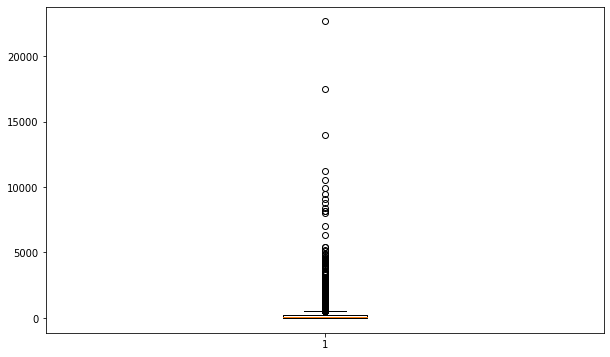

In [ ]:
# Check the outliers in sales columns
plt.figure(figsize=(10,6))
plt.boxplot(df['Sales'])
plt.show()

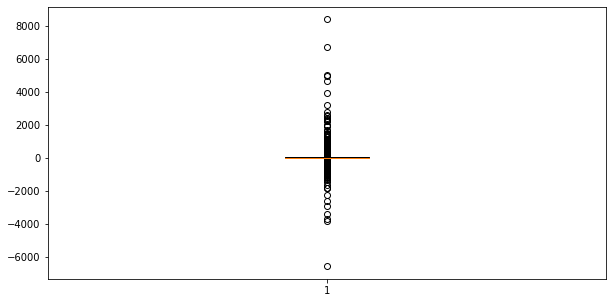

In [ ]:
# outliers in profit columns
plt.figure(figsize=(10,5))
plt.boxplot(df['Profit'])
plt.show()

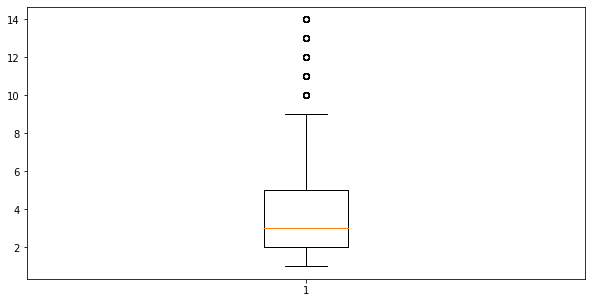

In [ ]:
# outliers in qunatity columns
plt.figure(figsize=(10,5))
plt.boxplot(df['Quantity'])
plt.show()

From the above plot we can conclude that Quantity have more outliers compared to Sales and Profit.

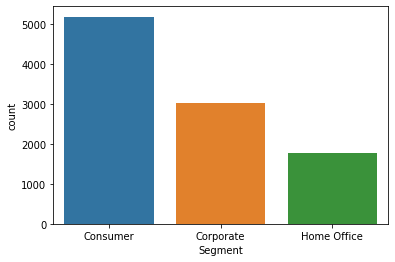

In [ ]:
# Let's explore Segment
sns.countplot(df['Segment'])

Mostly audience is Consumer and Corporate Segment.

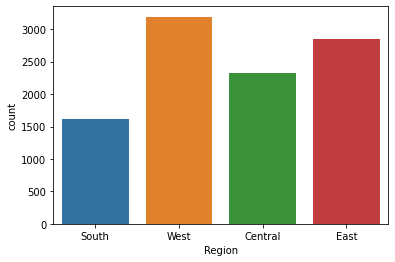

In [ ]:
# Let's explore Regions
sns.countplot(df['Region'])

Mostly audience is from West, East ,Central and South respectively

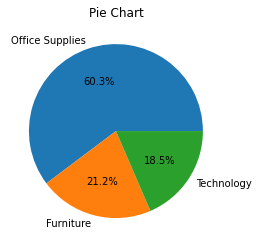

In [ ]:
# plot the pie chart of Category
plt.title('Pie Chart')
plt.pie(df['Category'].value_counts() , labels=df['Category'].value_counts().index ,autopct='%1.1f%%')
plt.show()

60.3% values are Office Supplies in Category.

# Bivariate Analysis

[]

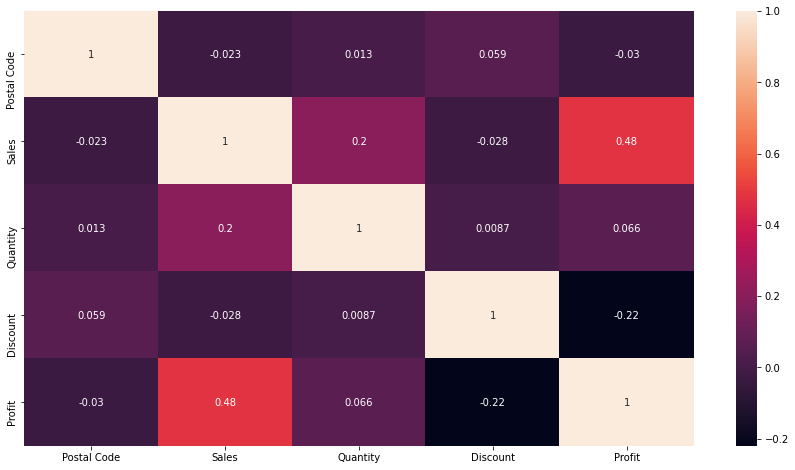

In [ ]:
## Let's plot a headmap between the numerical features
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True)
plt.plot()

* As we can see a negative corelation between the discount and profit . Let's understand with a example , if a businessman give more discount on thier product then the profit proportionally descreases , that's why there is negative corelation between discount and profit.

* There is a positive corelation between the sales and profit i.e. if sales increases then the profit increases.
 

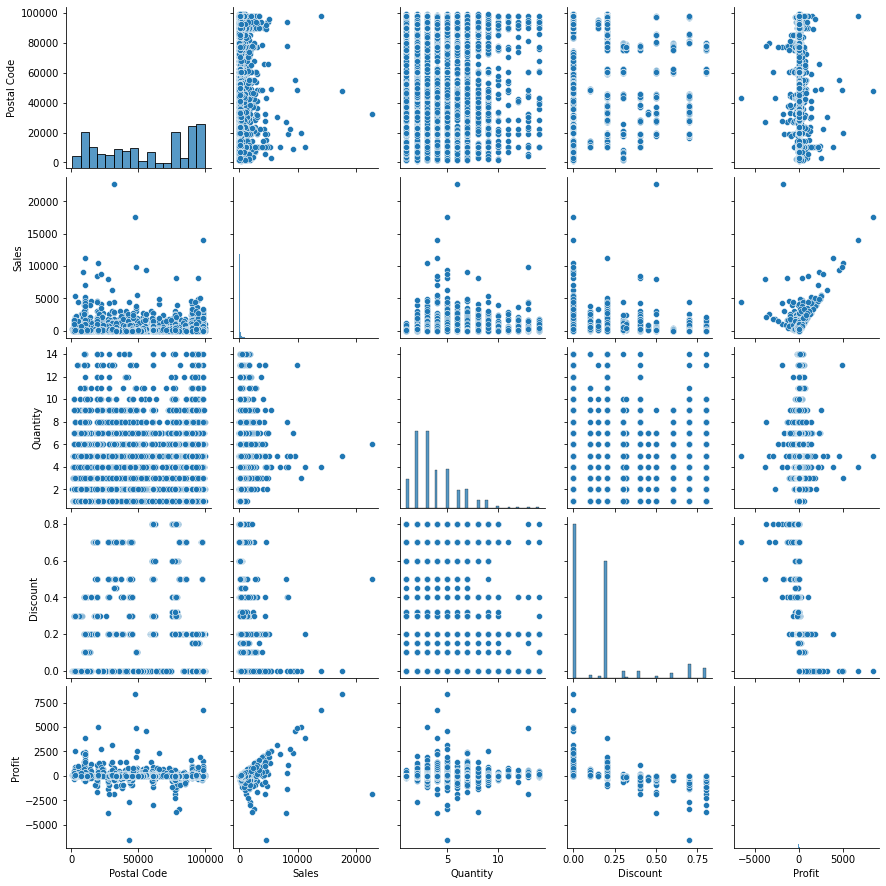

In [ ]:
# Scatter plots of complete data
sns.pairplot(df)

This plot shows us the same results as the heatmap shows i.e. if Discount increases then the Profit decreases and if the Sales increases then Profit also increases.

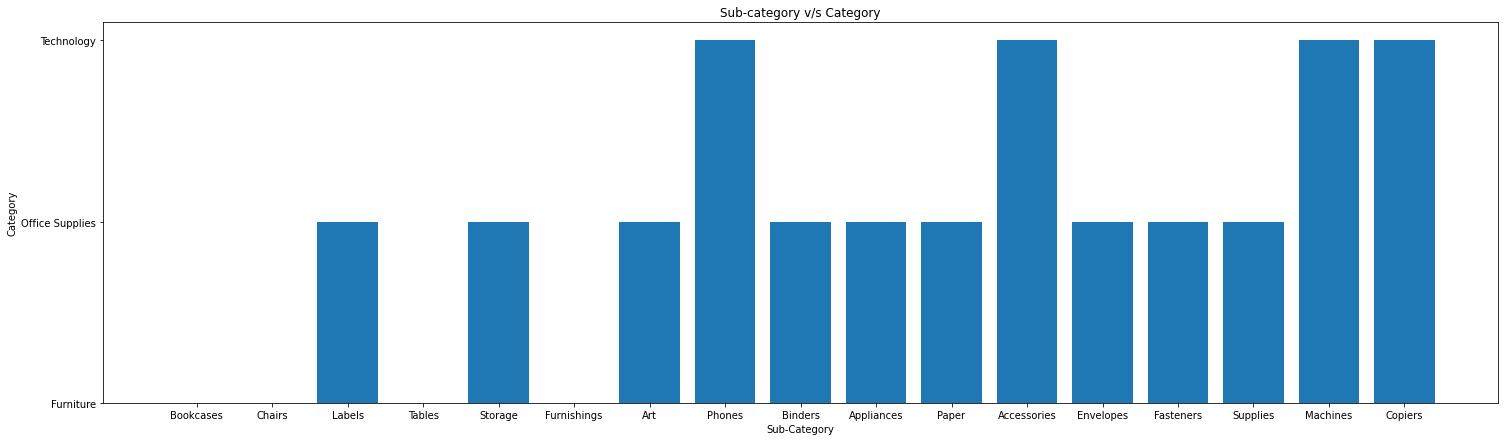

In [ ]:
# Plot between category and subcategory
plt.figure(figsize=(25 ,7))
plt.bar(df['Sub-Category'] , df['Category'])
plt.title('Sub-category v/s Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

From above we can conclude that Phones , Accessories , Machines , Copiers are most popular items and Bookcases , Chairs , Tables , Furnishings are least popular.

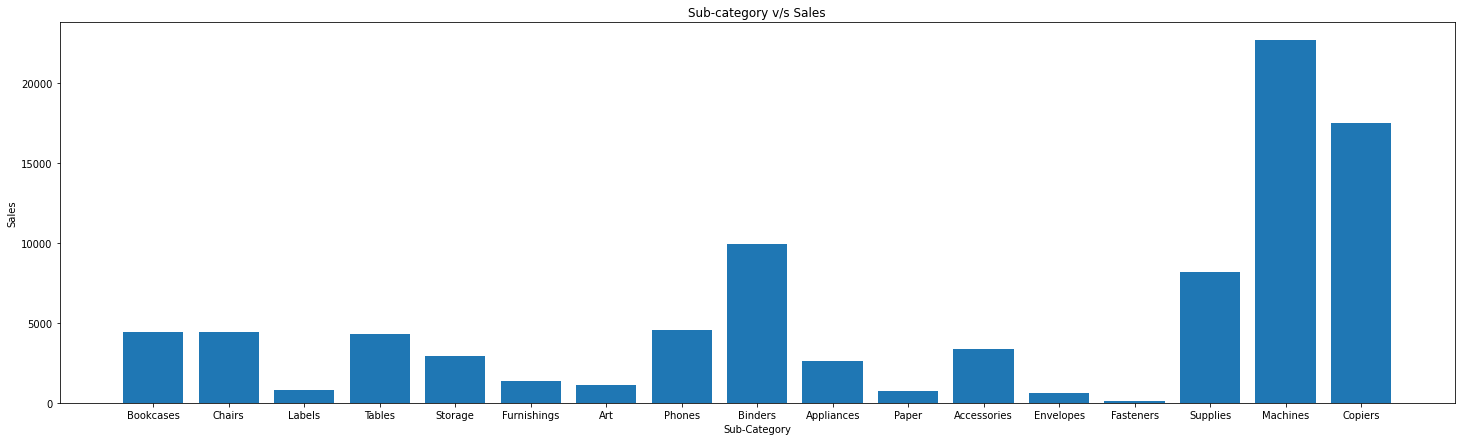

In [ ]:
# Plot between Sales and subcategory
plt.figure(figsize=(25 ,7))
plt.bar(df['Sub-Category'] , df['Sales'])
plt.title('Sub-category v/s Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

From above we can conclude that Machines , Copiers , Binders Sub-category , Supplies are good selling products.

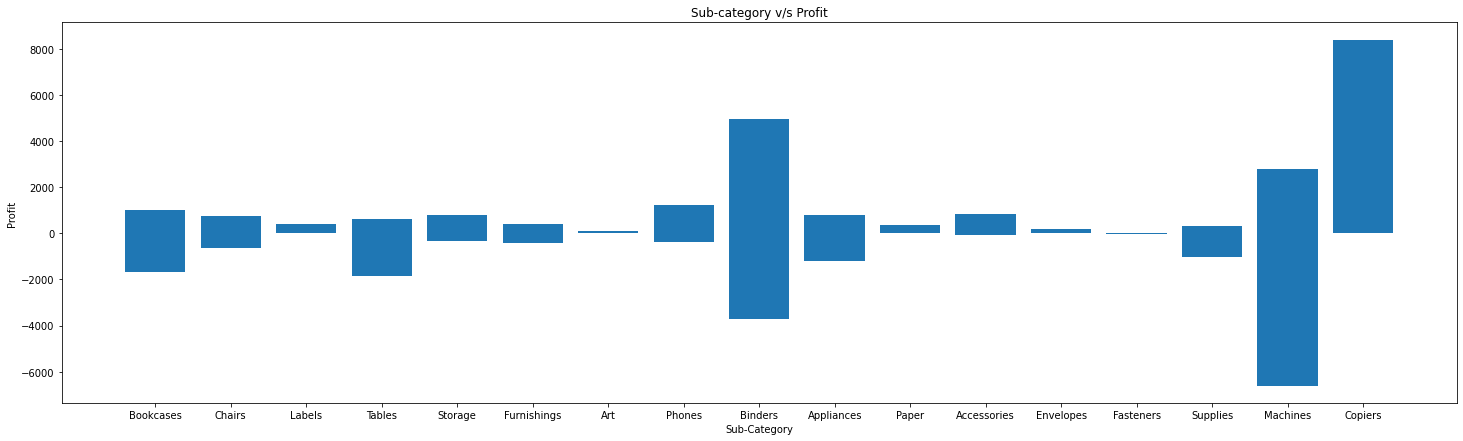

In [ ]:
# Plot between Profit and subcategory
plt.figure(figsize=(25 ,7))
plt.bar(df['Sub-Category'] , df['Profit'])
plt.title('Sub-category v/s Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

From above we can conclude that Copiers and Binders Sub-Category are the most profitable items.

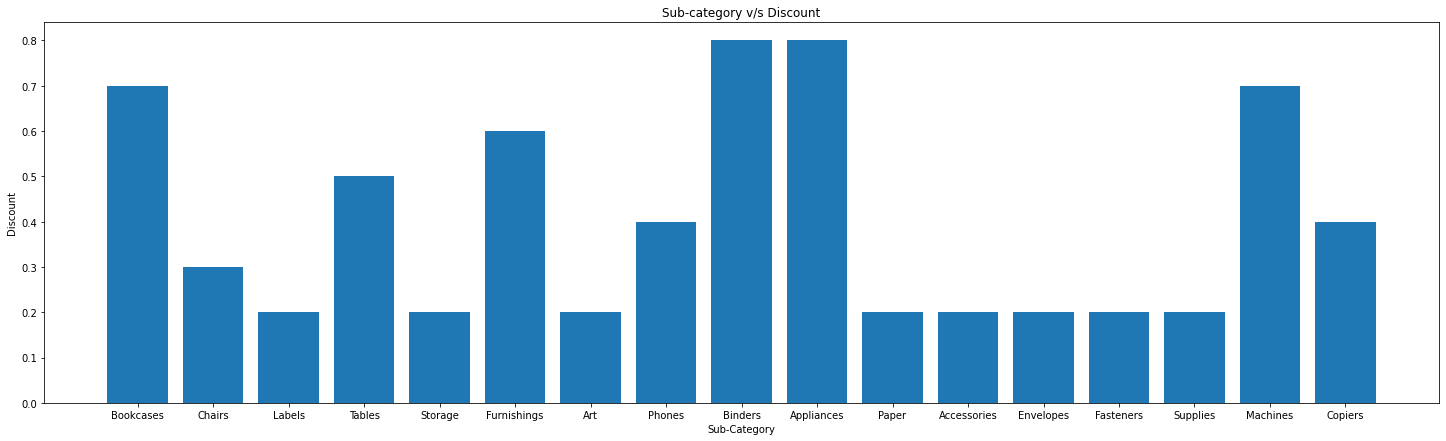

In [ ]:
# Plot between Discount and subcategory
plt.figure(figsize=(25 ,7))
plt.bar(df['Sub-Category'] , df['Discount'])
plt.title('Sub-category v/s Discount')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.show()

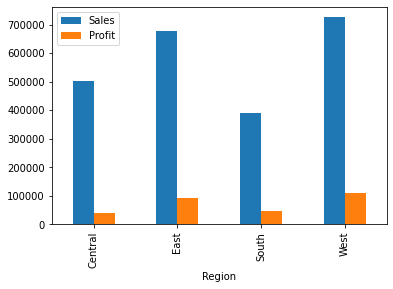

In [ ]:
# Plot between Profit , Sales and Region
df.groupby('Region')['Sales', 'Profit'].agg('sum').plot(kind='bar')

We can conclude that most Sales and Profit are from West and East followed by Central and South.

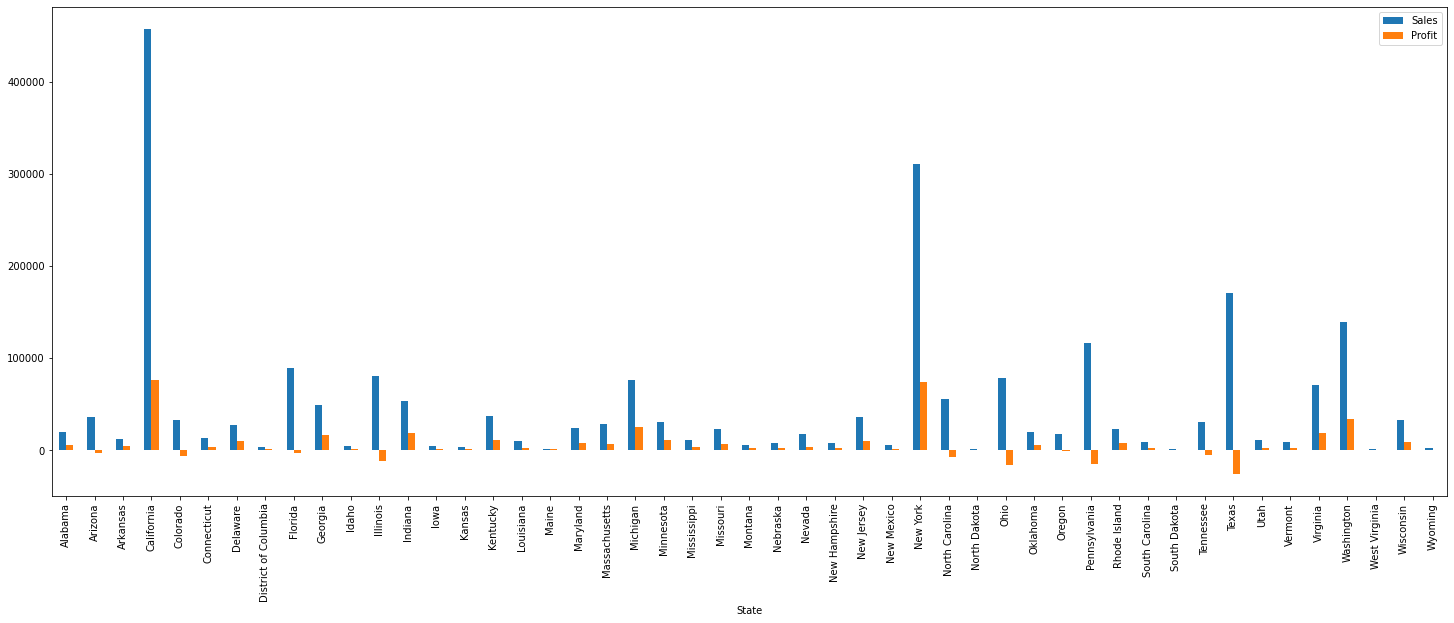

In [ ]:
df.groupby('State')['Sales', 'Profit'].agg('sum').plot(kind='bar' , figsize=(25 , 9))

Sales and Profit are in California and New York are high.

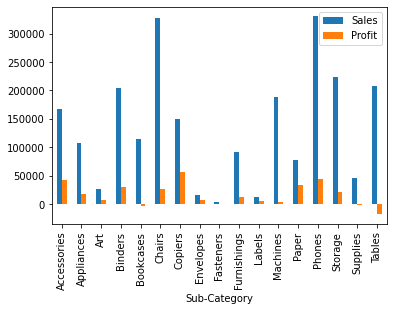

In [ ]:
df.groupby('Sub-Category')['Sales', 'Profit'].agg('sum').plot(kind='bar')

Copiers , Phones and Accessories are more profitable Sub-Category.

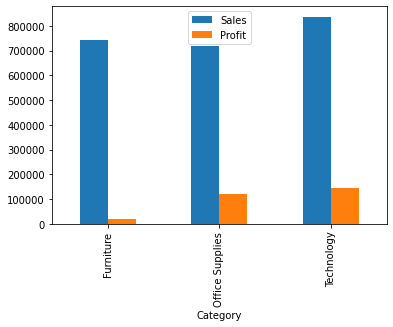

In [ ]:
df.groupby('Category')['Sales', 'Profit'].agg('sum').plot(kind='bar')

Sales and Profit are high in Technology Category.

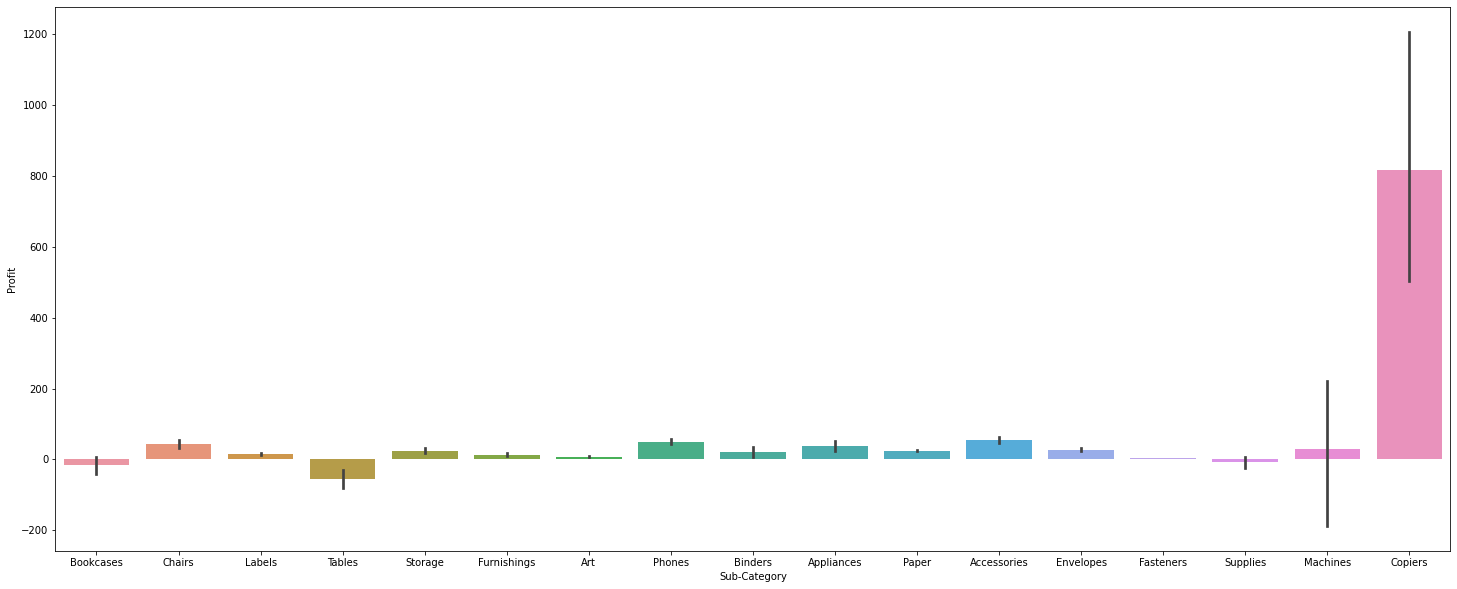

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(df['Sub-Category'],df['Profit'])
plt.show()

Copiers are the most porfitable Sub-Category.

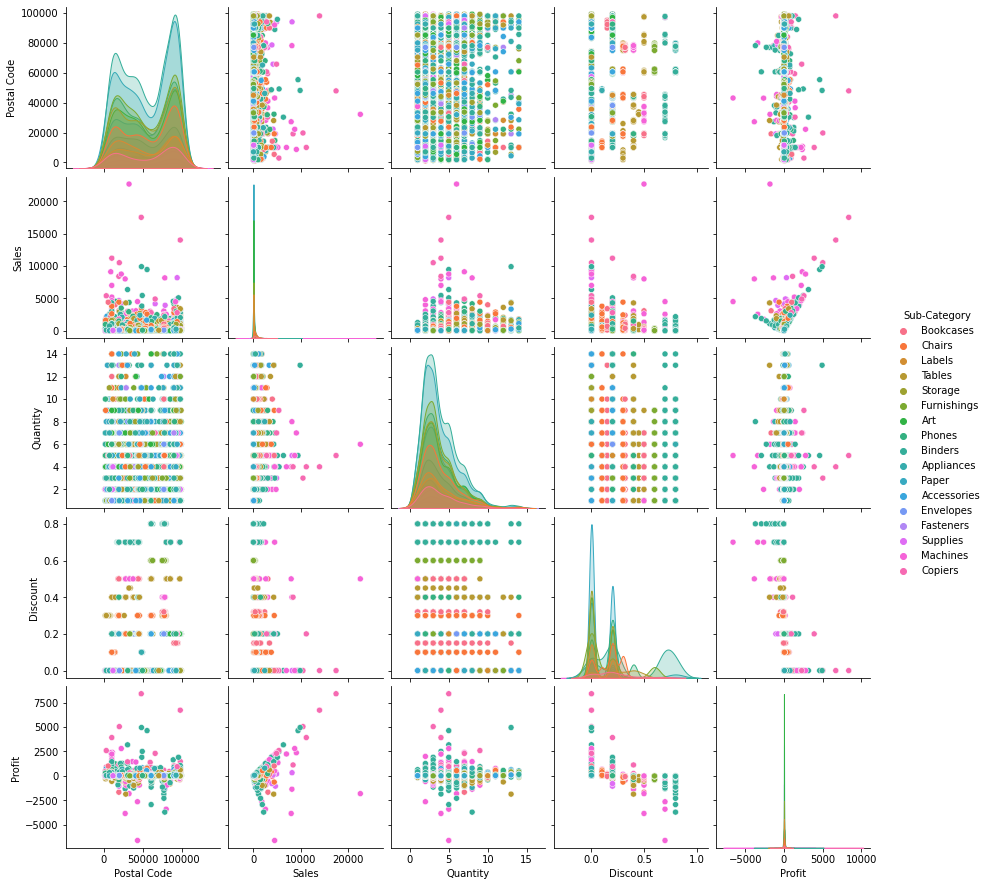

In [ ]:
sns.pairplot(df , hue='Sub-Category')

In [ ]:
df.groupby('State')['Profit'].agg(['count' , 'sum', 'mean', 'median', 'std', 'var', 'min', 'max' ])

,count,sum,mean,median,std,var,min,max
State,,,,,,,,
Alabama,61,5786.8253,94.865989,16.87500,210.901876,44479.601429,0.0000,1459.2000
Arizona,224,-3427.9246,-15.303235,2.53365,109.266267,11939.117124,-814.4832,211.4955
Arkansas,60,4008.6871,66.811452,18.34080,123.249880,15190.532873,1.4190,843.1706
California,1996,76330.7891,38.241878,13.33380,97.803399,9565.504848,-325.5720,1906.4850
Colorado,182,-6527.8579,-35.867351,3.12480,276.424024,76410.240842,-3399.9800,247.9960
Connecticut,82,3511.4918,42.823071,12.18310,66.138081,4374.245726,-15.5826,294.6710
Delaware,96,9977.3748,103.930988,19.19700,518.953513,269312.749126,-48.7839,5039.9856
District of Columbia,10,1059.5893,105.958930,14.52720,213.461353,45565.749398,4.4344,648.5624
Florida,383,-3399.3017,-8.875461,2.93400,126.324165,15957.794770,-1811.0784,327.5922


# Observations

* **Profit has a strong correlation with Sales and a negative correlation with Discount.**
* **California and New York does have the more sales so the profits.**

* **Office Supplies are most sold.**

* **There is almost no sale in fastners and art supplies , so can be limited.**

* **West and East regions are doing very well in wrt sales.**

* **Copiers and Machines are most selling products.**

* **The company can do well by reducing the expenses and discounts , also company should focus more on sales of office goods.**